In [1]:
import mne
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def file_to_data(fileName):
    #17eme dans data ce sont les labels
    #16 premiere les electrodes
    
    raw = mne.io.read_raw_edf(fileName, preload=True)

    #for ligne in raw._data:
    #plt.plot([r[0] for r in raw._data)
    #plt.plot(raw._data[0,:100])
    plt.plot(raw._data[-1,:])


    montage = mne.channels.read_montage("standard_1020")
    montage.plot()
    data = raw._data
    events = mne.find_events(raw, initial_event=True, consecutive=True)
    print("debut test sur events")
    for e in events:
        if(e[2]!=33285 and e[2]!= 33286):
            print(e)
    print("fin test sur events")
    """
    #On modifie pour avoir un dataset avec 1 : yeux ouvert et -1 yeux fermée
    new_data=[]
    timeStamp=[]
    yeux_ouvert=False
    nbEtat=0
    for k in range(len(data)):
        if(yeux_ouvert==False):
            tmp=np.append(data[k][1:17],-1)
        else:
            tmp=np.append(data[k][1:17],1)
        timeStamp.append(data[k][0])
        new_data.append(tmp)
        if(data[k][17]==1):
            nbEtat+=1
            yeux_ouvert=True
        if(data[k][18]==1):
            nbEtat+=1
            yeux_ouvert=False
    labels= [d[16] for d in new_data]
    donnees = [d[:16] for d in new_data]
    return donnees,labels,timeStamp,nbEtat
    """
    return 0,0,0,0

Extracting EDF parameters from data/subject1/Session1/1.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 159231  =      0.000 ...   310.998 secs...


<ipython-input-2-f2479a170958>:5: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raw = mne.io.read_raw_edf(fileName, preload=True)
<ipython-input-2-f2479a170958>:5: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw = mne.io.read_raw_edf(fileName, preload=True)


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 93 unique labels.


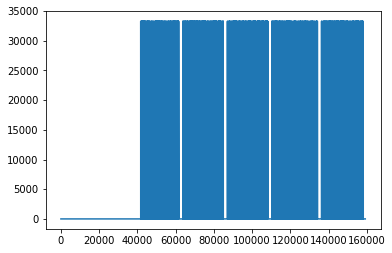

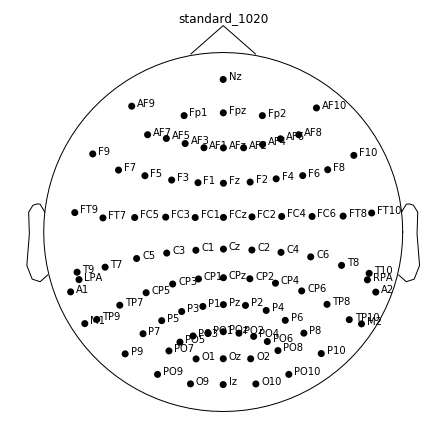

480 events found
Event IDs: [33285 33286]
debut test sur events
fin test sur events


In [3]:
donnees,labels,timeStamp,nbEtat = file_to_data("data/subject1/Session1/1.gdf")

In [4]:
print(timeStamp[-1]/60)
print(len(donnees))
print(len(donnees)/timeStamp[-1])
print(nbEtat)

TypeError: 'int' object is not subscriptable

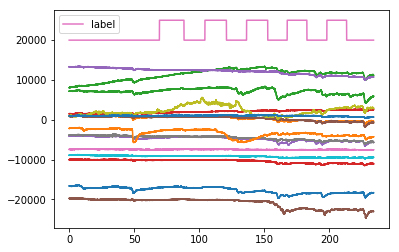

In [69]:
import matplotlib.pyplot as plt
plt.plot(timeStamp,donnees)
new_lab=[]
for l in labels:
    if(l==1):
        new_lab.append(25000)
    else:
        new_lab.append(20000)
plt.plot(timeStamp,new_lab,label="label")
plt.legend()
plt.show()

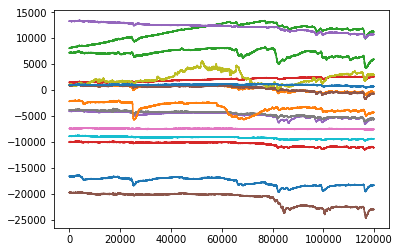

In [61]:
plt.plot(donnees)
plt.show()